In [1]:
# Catalina Savage
# AST 5263
# Lab 1 - Radio Telescope

In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# from astropy import *
# from scipy   import *

In [3]:
# Problem 1

In [4]:
# constants
freq = 1420.40575177 # MHz
d    = 1.0           # m
wvl  = 0.2111        # m = 21.11 cm

In [5]:
# formulas
theta_rad = 1.22 * ( wvl/d )          # Rayleigh criterion, radians
theta_deg = theta_rad * ( 180/np.pi ) # convert radians to degrees

In [6]:
print( f"The Rayleigh criterion for Robinson Observatory's radio telescope is {theta_deg} degrees." ) # final answer

The Rayleigh criterion for Robinson Observatory's radio telescope is 14.756069647358247 degrees.


In [7]:
print( 'Rayleigh criterion for RO in radians:', theta_rad )

Rayleigh criterion for RO in radians: 0.257542


In [8]:
# Problem 2

In [9]:
# constants
sdr_a = 360 # degrees
# sdr_h = 24  # sidereal hours, not really necessary in this problem

# solar time
sol_h = 23  # hours
sol_m = 56  # minutes
sol_s = 3.1 # seconds

exp_t = 2   # exposure time, minutes
# find exp_a; exposure angle, degrees

In [10]:
# convert solar time from hr/min/sec to minutes
sol_hm = sol_h * 60       # hr, min/hr
sol_sm = sol_s * ( 1/60 ) # sec, min/sec

In [11]:
sol_mtot = sol_hm + sol_m + sol_sm  # total minutes in a solar day
exp_a    = ( exp_t*360 ) / sol_mtot # convert minutes to degrees

In [12]:
print( 'Total minutes in a solar day:', sol_mtot )

Total minutes in a solar day: 1436.0516666666667


In [13]:
print( f'In a 2-minute exposure we used to collect data, the sky spins through {exp_a} degrees.' ) # final answer

In a 2-minute exposure we used to collect data, the sky spins through 0.501374718411942 degrees.


In [14]:
# Problem 3

In [15]:
lab1_dat  = np.loadtxt( 'AST 5263 Lab 1/lab-1-files_0007.txt', skiprows=1 )
freq = lab1_dat[ :, 0 ] # frequency, MHz
ampl = lab1_dat[ :, 1 ] # amplitude, arbitrary unit

In [16]:
print( lab1_dat )

[[1.42025570e+03 2.26652000e-04]
 [1.42025863e+03 2.27500000e-04]
 [1.42026156e+03 2.33260000e-04]
 ...
 [1.42174691e+03 2.23624000e-04]
 [1.42174984e+03 2.25079000e-04]
 [1.42175277e+03 2.25089000e-04]]


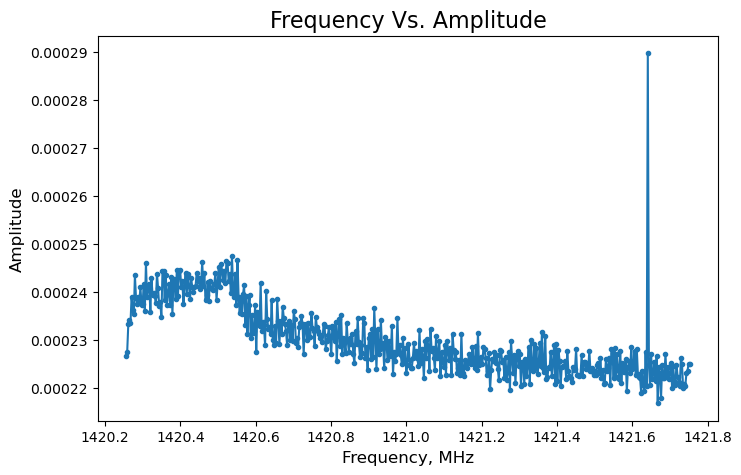

In [17]:
plt.figure( figsize=(8,5) )
plt.plot( freq, ampl, marker='.' )

plt.title( 'Frequency Vs. Amplitude', fontsize=16 )

plt.xlabel( 'Frequency, MHz', fontsize=12 )
plt.ylabel( 'Amplitude', fontsize=12 )

plt.show()

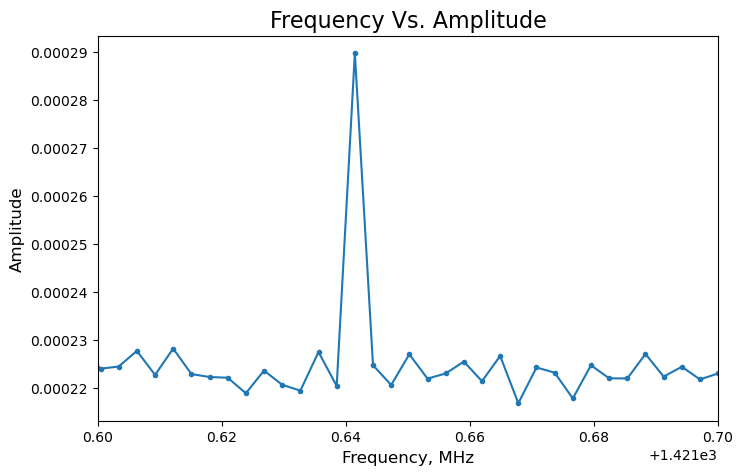

In [18]:
plt.figure( figsize=(8,5) )
plt.plot( freq, ampl, marker='.' )

plt.title( 'Frequency Vs. Amplitude', fontsize=16 )

plt.xlabel( 'Frequency, MHz', fontsize=12 )
plt.ylabel( 'Amplitude', fontsize=12 )

plt.xlim( [1421.60,1421.70] )
# plt.ylim()

plt.show()

In [19]:
# Problem 4

In [20]:
freq_max  = freq.max() 
freq_min  = freq.min()
bandwidth = freq_max - freq_min

In [21]:
print( f'Maximum frequency: {freq_max} MHz' )
print( f'Minimum frequency: {freq_min} MHz' )
print( f'Bandwidth of the spectrum: {bandwidth} MHz' )

Maximum frequency: 1421.752770313 MHz
Minimum frequency: 1420.2557 MHz
Bandwidth of the spectrum: 1.4970703129999947 MHz


In [22]:
# Problem 5

bins = len( freq )
print( 'Number of frequency bins:', bins )

Number of frequency bins: 512


In [23]:
# Problems 6 & 7

In [24]:
nu     = 1420.40575177 # MHz
del_nu = 0.0029296875  # MHz
c      = 299792.458    # km/s

In [25]:
res = nu / del_nu

In [26]:
print( 'Spectrum resolution:', res )

Spectrum resolution: 484831.82993749337


In [27]:
# print( freq )

In [28]:
v = [ ((c * (nu - n) )/ nu) for n in freq ]

print( v[0] )

31.670097716465907


In [29]:
v_test = c * (nu - freq)/nu

print( v_test[0] )
# Ha ha, after printing this, I realized the for loop was USELESS

31.670097716465907


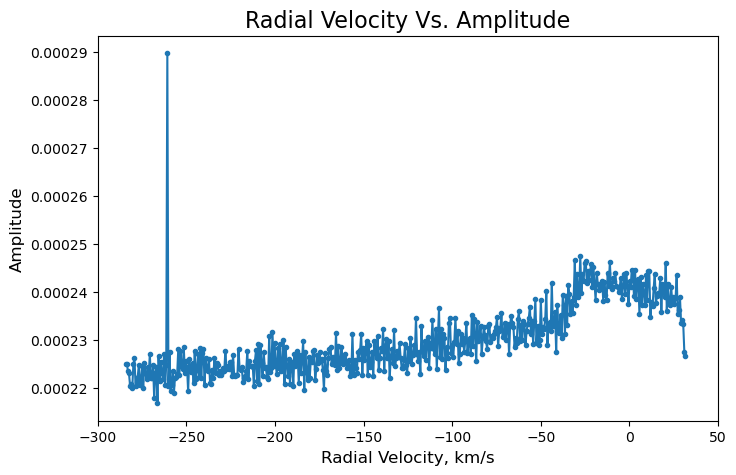

In [30]:
plt.figure( figsize=(8,5) )
plt.plot( v, ampl, marker='.' )

plt.title( 'Radial Velocity Vs. Amplitude', fontsize=16 )

plt.xlabel( 'Radial Velocity, km/s', fontsize=12 )
plt.ylabel( 'Amplitude', fontsize=12 )

plt.xlim( [-300,50] )

plt.show()

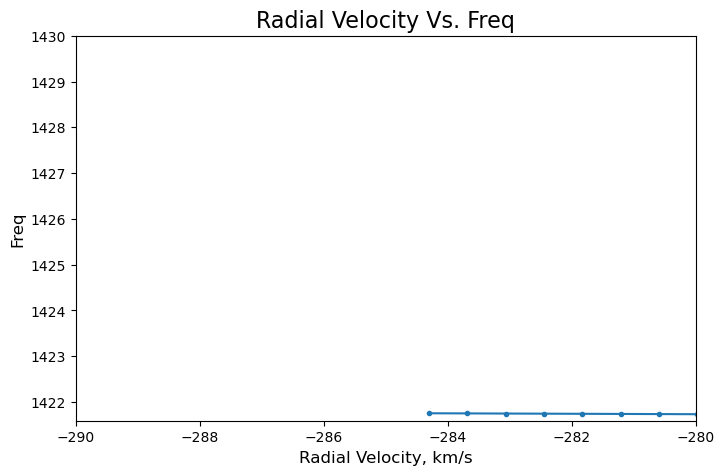

In [31]:
plt.figure( figsize=(8,5) )
plt.plot( v, freq, marker='.' )

plt.title( 'Radial Velocity Vs. Freq', fontsize=16 )

plt.xlabel( 'Radial Velocity, km/s', fontsize=12 )
plt.ylabel( 'Freq', fontsize=12 )

plt.xlim( [-290,-280] )
plt.ylim( [1421.59,1430] )

plt.show()

# print( np.max( v ) )

In [32]:
# Problem 8

In [33]:
# There is a massive peak around 1421.75 MHz, which corresponds to bewteen -284 and -285 km/s
# away from Earth. There is another peak that correspond to -50 to 50 km/s. 

In [34]:
# Problem 9

In [35]:
# ampl_med = np.median( ampl[325:462] ), range was too big

ampl_med = np.median( ampl[360:462] )
freq_med = np.median( freq[360:462] )

In [36]:
print( f'Median outside hydrogen peak:', ampl_med )
print( f'Corresponding frequency: {freq_med} MHz' )

Median outside hydrogen peak: 0.0002242015
Corresponding frequency: 1421.4583367189998 MHz


In [37]:
# Problem 10

In [38]:
A_i       = ampl - ampl_med
A_i_range = A_i[ 0 : 104 ]
A_i_sum   = sum( A_i_range )

peak_flux   = del_nu * A_i_sum

In [39]:
print( f'Total integrated flux: {peak_flux}, del_nu in MHz' )

Total integrated flux: 4.964478515625e-06, del_nu in MHz


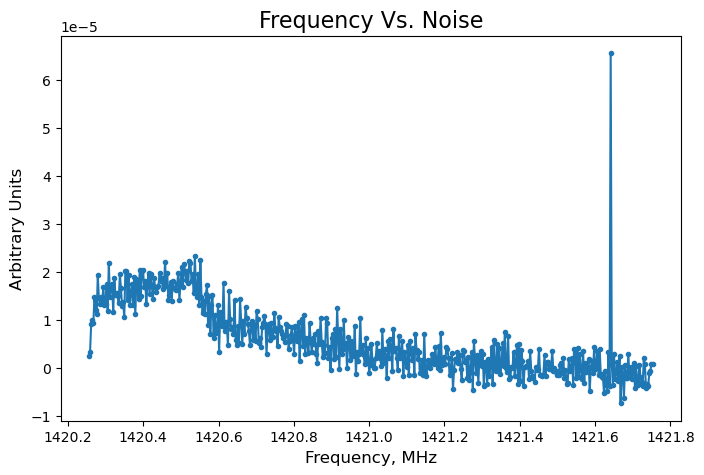

In [40]:
plt.figure( figsize=(8,5) )
plt.plot( freq, A_i, marker='.' )

plt.title( 'Frequency Vs. Noise', fontsize=16 )

plt.xlabel( 'Frequency, MHz', fontsize=12 )
plt.ylabel( 'Arbitrary Units', fontsize=12 )

plt.show()

In [41]:
# print( 2929.6875 * noise_sum, ', del_nu in Hz' )